# **RFM Supermarket Analysis**

### Team Members:
> - Zia Tabaruk
> - Zacharia Bachtiar
> - Muhammad Alif Syahreza

![DALL·E 2024-09-11 07.07.55 - A wide design themed around a 'Supermarket' with a dark background. The design includes minimal icons like shopping carts, shelves, and barcodes in bl.webp](<attachment:DALL·E 2024-09-11 07.07.55 - A wide design themed around a 'Supermarket' with a dark background. The design includes minimal icons like shopping carts, shelves, and barcodes in bl.webp>)
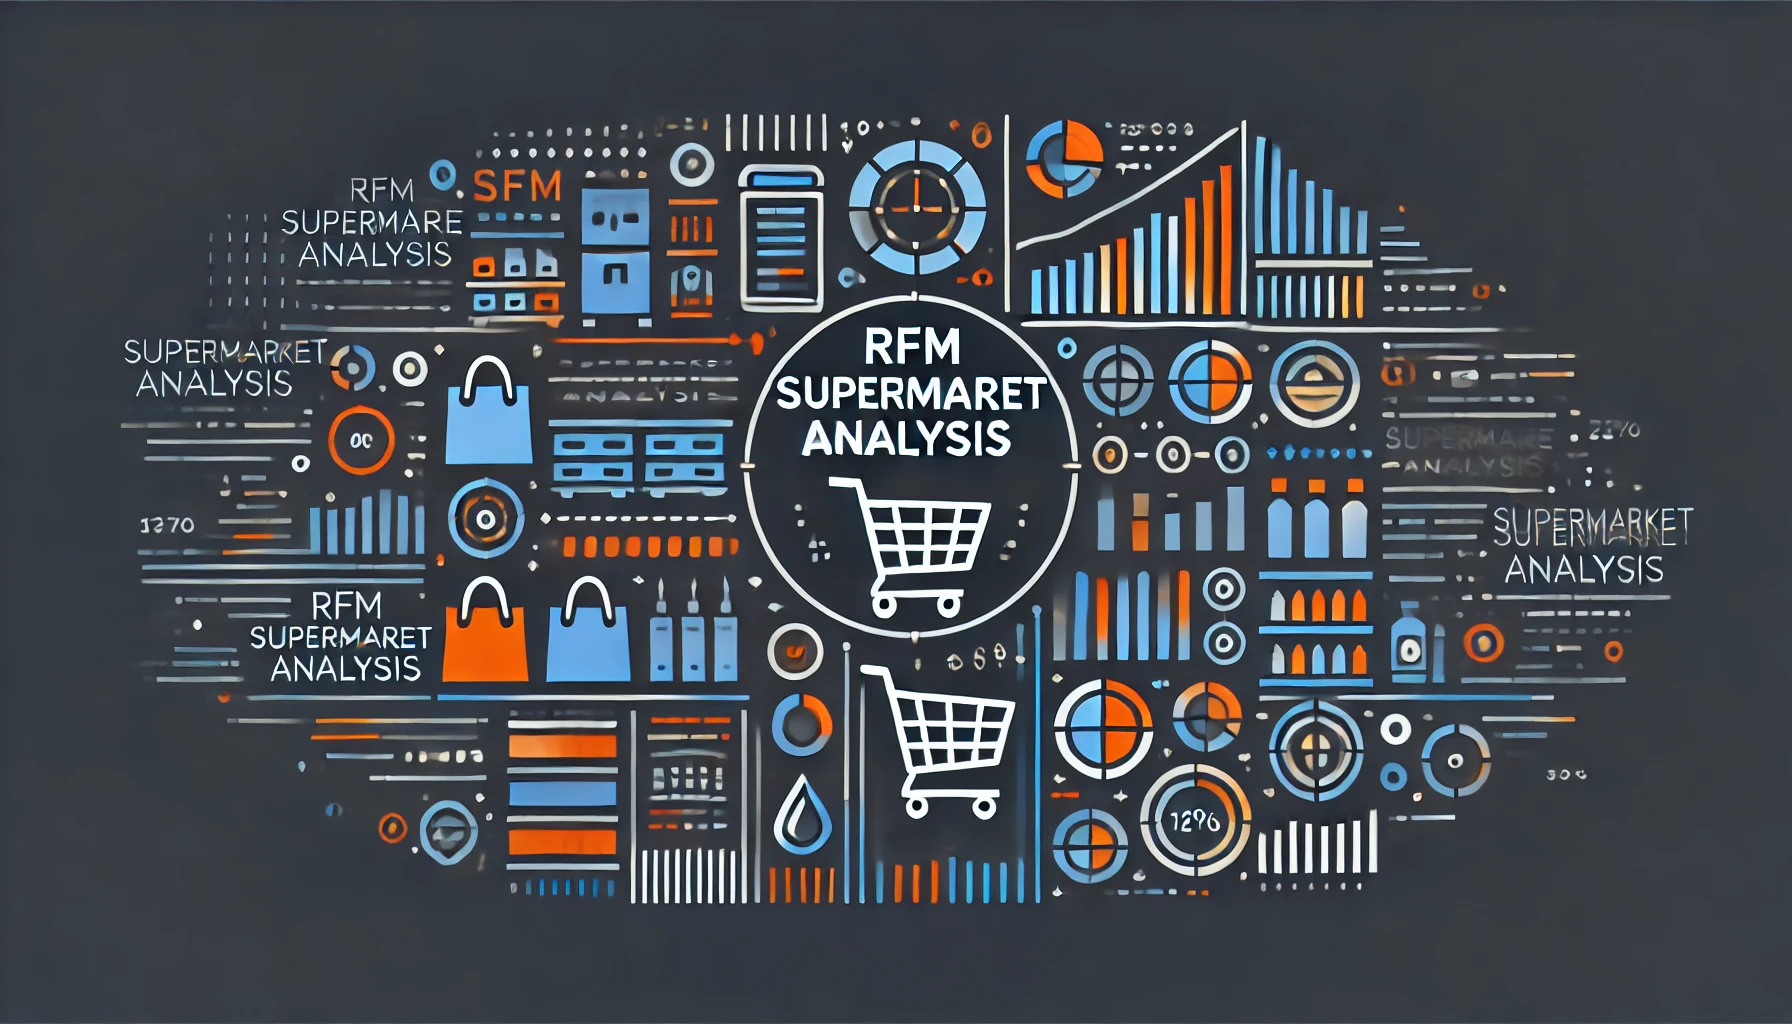

## **Background**
RFM (Recency, Frequency, Monetary) analysis is a `customer segmentation technique` used in marketing to evaluate and understand customer behavior.

The `dataset` include data on sales of consumer goods obtained by ‘scanning’ the bar codes for individual products at electronic points of sale in a retail store. 

The data provide `detailed information` about quantities, characteristics and values of goods sold as well as their prices.

The anonymized dataset includes `64.682 transactions` of 5.242 SKU's sold to 22.625 customers during one year.

## **Stakeholders**

- **Marketing Team:** Responsible for designing and `implementing marketing strategies` based on RFM analysis results.

## **Problem Statement**

- How can the supermarket use RFM analysis to `segment customers` based on purchasing behavior and optimize promotions to improve customer retention and engagement?

## **Goals**

- By implementing RFM analysis, companies can `classify customers based on their value`, develop targeted marketing strategies for each segment to increase customer retention and maximize profits.

## **Data Understanding**

**Sales Transaction Dataset**
| No | Column | Description |
|-----|----------------|-----------------------------------------------------------------------------------------|
| 1 | `Date` | The date the transaction occurred. Written in standard format (DD/MM/YYYY) to indicate when the transaction occurred. |
| 2 | `Customer_ID` | A unique identification number assigned to each customer. Used to track and identify transactions made by a particular customer. |
| 3 | `Transaction_ID` | A unique identification number assigned to each transaction made. Makes it easier to track specific transactions in the system. |
| 4 | `SKU_Category` | A category of Stock Keeping Unit (SKU), indicating the type of product sold, such as clothing, electronics, food, etc. |
| 5 | `SKU` | Stock Keeping Unit (SKU), a unique code assigned to each product or item in inventory. Used to track inventory and quickly identify products. |
| 6 | `Quantity` | The number of units of a product sold in a given transaction. Shows how many items were purchased by a customer in a single transaction. |
| 7 | `Sales_Amount` | The total amount of sales generated from the transaction, usually in a specific currency. Calculated by the price per unit multiplied by the quantity of the product sold. |

### **Import Data**
> The first step is to import the datasets and libraries required for analysis.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore') 

In [28]:
df = pd.read_csv('scanner_data.csv')

# drop unused column
df.drop('Unnamed: 0', axis=1, inplace=True)

## **Data Cleaning**

### **Handle Missing Values**
> Identify and resolve any missing records.

In [29]:
df.isna().sum()

Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

### **Handle Duplicates**
> Identify and resolve any duplicate records to ensure accurate and reliable results.

In [30]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount]
Index: []


### **Data Formatting**  
> Convert the `Date` column from object type to datetime format for accurate time-based analysis.

In [31]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            131706 non-null  datetime64[ns]
 1   Customer_ID     131706 non-null  int64         
 2   Transaction_ID  131706 non-null  int64         
 3   SKU_Category    131706 non-null  object        
 4   SKU             131706 non-null  object        
 5   Quantity        131706 non-null  float64       
 6   Sales_Amount    131706 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 7.0+ MB


## **<ins>RFM Analysis</ins>**

### **Calculating Recency, Frequency, and Monetary Value**
> ##### **Recency**: Measures the number of days since the customer's last purchase.
> ##### **Frequency**: Counts how often a customer made purchases within a given period.
> ##### **Monetary**: Represents the total spending of a customer during the analysis period ($).

In [32]:
rfm_start_date = df.sort_values(by=['Date'], ascending=False)['Date'].iloc[0] + pd.Timedelta(days=1)

rfm = df.groupby(['Customer_ID']).agg({'Date': lambda x: (rfm_start_date - x.max()).days,
                                     'Transaction_ID': lambda x: x.nunique(),
                                     'Sales_Amount': lambda x: x.sum()})

In [33]:
rfm.columns = ['R_value', 'F_value', 'M_value']

rfm

,R_value,F_value,M_value
Customer_ID,,,
1,345,1,16.29
2,196,2,22.77
3,365,1,10.92
4,53,2,33.29
5,180,5,78.82
...,...,...,...
22621,22,1,9.69
22622,16,1,6.07
22623,11,1,128.01


### **Calculating Recency, Frequency, and Monetary *Score***
> ##### **Scoring (1-5)**: The score for each calculations is in the range of 1-5, the higher the better.

> ##### Percentiles (rank method) are useful for ensuring that your scoring reflects relative performance. For instance, the top 20% of customers (highest values) can be assigned the highest score regardless of the actual value.

In [34]:
rfm['R_percentile'] = rfm['R_value'].rank(pct=True,ascending=False)
rfm['F_percentile'] = rfm['F_value'].rank(pct=True,ascending=True)
rfm['M_percentile'] = rfm['M_value'].rank(pct=True,ascending=True)

rfm['R_score'] = pd.cut(rfm['R_percentile'], 5, labels=range(5,0,-1))
rfm['F_score'] = pd.cut(rfm['F_percentile'], 5, labels=range(1,6,1))
rfm['M_score'] = pd.cut(rfm['M_percentile'], 5, labels=range(1,6,1))

rfm

,R_value,F_value,M_value,R_percentile,F_percentile,M_percentile,R_score,F_score,M_score
Customer_ID,,,,,,,,,
1,345,1,16.29,0.041525,0.254939,0.389834,5,1,2
2,196,2,22.77,0.425481,0.602674,0.488751,3,3,3
3,365,1,10.92,0.000994,0.254939,0.268287,5,1,2
4,53,2,33.29,0.733613,0.602674,0.594807,2,3,3
5,180,5,78.82,0.452066,0.862807,0.794188,3,5,4
...,...,...,...,...,...,...,...,...,...
22621,22,1,9.69,0.862829,0.254939,0.237768,1,1,2
22622,16,1,6.07,0.900707,0.254939,0.122254,1,1,1
22623,11,1,128.01,0.937039,0.254939,0.871249,1,1,5


### **Combining All Three Score**

In [35]:
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

rfm

,R_value,F_value,M_value,R_percentile,F_percentile,M_percentile,R_score,F_score,M_score,RFM_score
Customer_ID,,,,,,,,,,
1,345,1,16.29,0.041525,0.254939,0.389834,5,1,2,512
2,196,2,22.77,0.425481,0.602674,0.488751,3,3,3,333
3,365,1,10.92,0.000994,0.254939,0.268287,5,1,2,512
4,53,2,33.29,0.733613,0.602674,0.594807,2,3,3,233
5,180,5,78.82,0.452066,0.862807,0.794188,3,5,4,354
...,...,...,...,...,...,...,...,...,...,...
22621,22,1,9.69,0.862829,0.254939,0.237768,1,1,2,112
22622,16,1,6.07,0.900707,0.254939,0.122254,1,1,1,111
22623,11,1,128.01,0.937039,0.254939,0.871249,1,1,5,115


### **Assign Segmentation Based on RFM Score**

In [36]:
def segment_customer_by_rfm(rfm_score):
    segment_map = {
    # Champions: high recency, high frequency, high monetary
    'Champions': ['555', '554', '545', '445', '544'],

    # Loyal Customers: high frequency and monetary, but slightly lower recency
    'Loyal Customers': ['552', '553', '543', '444', '535', '435', '355', '354', '345', '335'],

    # Potential Loyalist: moderate recency, high frequency and monetary
    'Potential Loyalist': ['534', '533', '443', '434', '442', '433', '532', '531', '451', '452'],

    # New Customers: high recency but lower frequency and monetary value
    'New Customers': ['511', '513', '515', '514', '521',  '512', '421', '411', '422'],

    # Promising: good recency, moderate frequency and monetary value
    'Promising': ['525', '524', '523', '425', '424', '423', '414', '413', '315', '314', '313'],

    # Needs Attention: moderate recency, lower frequency, and monetary value
    'Needs Attention': ['343','412', '415', '334', '325', '324', '323', '312', '311'],

    # About to Sleep: low recency and frequency, declining monetary value
    'About to Sleep': ['333', '332', '322', '232', '231', '221', '213', '212', '211'],

    # At Risk: high monetary value in the past, but low recency
    'At Risk': ['255', '254', '245', '244', '243', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124'],

    # Hibernating: very low recency, frequency, and monetary value
    'Hibernating': ['214', '215', '222', '223', '132', '123', '122'],

    # Lost Customers: very low on all three dimensions, unlikely to return
    'Lost Customers': ['111', '112', '113', '114', '115', '121', '131', '141', '151']
    }
    
    for segment, scores in segment_map.items():
        if rfm_score in scores:
            return segment

rfm['Customer_Segment'] = rfm['RFM_score'].apply(segment_customer_by_rfm)

In [37]:
# Hitung value counts dari kolom 'Customer_Segment'
value_counts = rfm['Customer_Segment'].value_counts()

# Reset index untuk mengubah Series menjadi DataFrame
value_counts_df = value_counts.reset_index()

# Ganti nama kolom menjadi 'Customer Segment' dan 'Count'
value_counts_df.columns = ['Customer Segment', 'Count']

# Jika ingin menampilkan data dalam format DataFrame
value_counts_df

,Customer Segment,Count
0,New Customers,4117
1,Needs Attention,2938
2,At Risk,2844
3,About to Sleep,2655
4,Promising,1592
5,Potential Loyalist,1375
6,Lost Customers,1232
7,Loyal Customers,1152
8,Champions,735
9,Hibernating,381


> #### **Segmentation Reference**: https://documentation.bloomreach.com/engagement/docs/rfm-segmentation

In [38]:
rfm.to_csv('rfm_retail_dataset_final.csv')

## **Insight**

### **`Customer Segmentation`** uses a combination of RFM (Recency, Frequency, Monetary) scores to group customers into 10 categories.

> `Champion:` Customers who have recently made a purchase, transact very often, and have a large monetary contribution. They are the most valuable customers.

> `Loyal Customer:` Customers who shop frequently and have a stable contribution, although their transactions are not always new.

> `Potential Loyalists:` Customers who have just started shopping frequently and have the potential to become loyal if well-retained.

> `New Customers:` New customers who have just made their first purchase.

> `Promising:` Customers who have just started transacting but are not regular, can become loyal if given encouragement.

> `Need Attention:` Customers who may have been active but are starting to lose their frequency and need attention to get them back.

> `About to Sleep:` Customers who are barely active and are on the verge of ceasing to transact.

> `At Risk:` Customers who were once active but are now rarely transacting, they are at risk of leaving the brand.

> `Hibernating:` Customers who are rarely transacting and have little to no activity.

> `Lost:` Customers who have not transacted in a long time, indicating that they may have left the brand.

## **Conclusion & Recommendation**

### **`Conclusion`**

> This segmentation provides a very clear view of customer behavior based on their engagement with the brand. From the most loyal customers to those who have left the brand, this code allows companies to understand the condition and status of each customer. With this information, companies can tailor their marketing and retention approaches based on each segment, from retaining their best customers to reviving customers who are close to being lost.

### **`Recommendation`**

> `Champion:` These are the best customers to retain. 

- Recommendation: Provide exclusive services, premium rewards, loyalty programs, or special invitations to brand events.

> `Loyal Customer:` They are stable customers. 

- Recommendation: Provide them with additional benefits such as regular discounts, early access to new products, or long-term loyalty programs.

> `Potential Loyalists:` Customers who have the potential to become loyal customers. 

- Recommendation: Provide attractive offers, discounts on their next purchase, or membership programs to strengthen their loyalty.

> `New Customers:` New customers need a good first experience. 

- Recommendation: Offer a warm welcome, special discount on their next purchase, or a referral program to bring them back.

> `Promising:` These customers are promising, but not yet fully engaged. 

- Recommendation: Offer more personalized promotions, special offers, or encouragement for repeat purchases.

> `Need Attention:` These customers need more attention to re-engage. 

- Recommendation: Send email reminders, special offers, or limited-time discounts to entice them to shop again.

> `About to Sleep:` These customers are on the verge of falling out of favor. 

- Recommendation: Create a retention campaign with a “last minute” offer or aggressive promotion before they fall out of favor.

> `At Risk:` Customers who are at risk of leaving the brand. 

- Recommendation: Re-engage with a compelling offer, such as a big discount or a loyalty program specifically for returning customers.

> `Hibernating:` Customers who are very infrequent spenders. 

- Recommendation: Create a special "We Miss You" campaign, or offer a discounted product bundle to lure them back.

> `Lost:` Customers who have been lost for a long time and are unlikely to return. 

- Recommendation: Reactivation campaigns with irresistible offers or special programs for returning customers after a long period of inactivity or **simply let them go**.

With the right strategy for each segment, companies can be more effective in managing customers, increasing retention, and optimizing marketing spend to increase the lifetime value of each customer segment.